In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$Y = median\_house\_value \Rightarrow$ Verkliga värden, målvariabel

$X = designmatris \Rightarrow$ Alla regressorer, shape

$\hat{\beta} = (X^TX)^{-1}X^TY \Rightarrow$ OLS-koefficienter - beräkning av alla $\beta$ från datan

$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 + \hat{\beta}_3X_3 ... + \hat{\beta}_dX_d \Rightarrow$ Modellens prediktion för varje observation

$e_i = Y_i - \hat{Y}_i \Rightarrow$ Residual för observation $i$

$SSE = \sum_{i=1}^{n} e_i^2 \Rightarrow$ Sum of Squared Errors - totala felet för modellen

$S_{yy} = \sum(Y_i - \bar{Y})^2 = \sum{Y_{i}}^2 - \frac{(\sum{Y_i})^2}{n} \Rightarrow$ Totala variationen i Y (ej varians)

$SSR = S_{yy} - SSE \Rightarrow$ Sum of Squares Regression - variation som modellen förklarar (ej varians)

$R^2 = \frac{SSR}{S_{yy}} \Rightarrow$ Bestämningskoefficient - hur mycket av Y som modellen förklarar

$\hat{\sigma}^2 = \frac{SSE}{n-d-1} \Rightarrow$ Mean Squared Error - estimering av residualvarians (använder $\frac{SSE}{n-d-1}$ istället för $\frac{SSE}{n}$ då den senare används i större utsträckning inom ML och uppgiften skulle vara en statistisk analys)

$RMSE = \sqrt{\hat{\sigma}^2} \Rightarrow$ Root Mean Squared Error - spridning i samma enhet som Y

$C = \hat{\sigma}^2(X^TX)^{-1} \Rightarrow$ Varians och kovarians för $\hat{\beta}$, används i t-test och konfidensintervall

$t_i = \frac{\hat{\beta}_i}{\hat{\sigma}\sqrt{c_{ii}}} \Rightarrow$ t-statistik - Testar om en enskild koefficient skiljer sig signifikant från 0

$p_i = 2(1-F_{t_{n-d-1}}(|t_i|)) \Rightarrow$ p-värden - Testar variablers signifikans mot target, alltså om det spelar roll ifall de är 0 eller ej

$F = \frac{SSR/d}{\hat{\sigma}^2} \Rightarrow$ Testar om alla regressorer tillsammans är signifikanta

$\hat{\beta}_i \pm t_{\alpha/2, n-d-1}\hat{\sigma}\sqrt{c_{ii}} \Rightarrow$ Intervallet för $\beta$ med viss säkerhetsnivå

$r = \frac{Cov(X_a,X_b)}{\sqrt{Var(X_a)Var(X_b)}} \Rightarrow$ Pearson $r$ - Mäta linjärt beroende mellan två regressorer

$p$-value $= P(F_{d,n-d-1} \gt F_{obs}) \Rightarrow$ p-värdet för modellen as a whole - Ger sannolikheten att observera en lika extrem eller mer extrem F-statistik under nollhypotesen

$CI_i = \hat{\beta}_i \pm t_{1-\alpha/2,n-d-1} \cdot \sqrt{\hat{\sigma}^2c_{ii}} \Rightarrow$ Räknar ut konfidensintervall för varje variabel

$n$ = antal observationer  
$d$ = antal regressorer  
$c_{ii}$ = diagonalelement i varians-kovariansmatrisen $C$  
$\bar{Y}$ = medelvärdet för Y  
Alla formler bygger direkt på residualerna $e_i$ och $X$-matrisen

Läser in datasetet som en dataframe och visar upp den för att inspektera datan

In [359]:
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Kontrollerar antalet NaNs av vilka det finns väldigt få och tar även reda på att det endast finns en kategorisk variabel

In [360]:
housing.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


Tar reda på lite basic information om de numeriska variablerna

In [361]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Tar reda på hur många dubbletter det finns av longitud + latitud-kombinationer

In [362]:
coord_counts = housing[['longitude', 'latitude']].value_counts()
duplicates = coord_counts[coord_counts > 1]
duplicates


longitude  latitude
-122.41    37.80       15
-122.44    37.78       11
-122.42    37.80       11
-122.27    37.85       10
-122.47    37.76       10
                       ..
-121.59    39.15        2
-121.58    39.15        2
           39.16        2
-121.56    39.16        2
-121.54    39.08        2
Name: count, Length: 4353, dtype: int64

Tar reda på hur många det finns av varje prisgrupp

In [363]:
housing['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
327900.0      1
438800.0      1
455500.0      1
200700.0      1
47000.0       1
Name: count, Length: 3842, dtype: int64

Tar reda på hur den kategoriska datan är uppdelad

In [364]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Med denna informationen är jag redo att börja undersöka datan djupare och jag börjar med att aggregera dataframen med funktionen aggregate från linreg.py till en observation per geografisk punkt (longitude, latitude) då flera punkter med samma koordinater förekommer mer än en gång. Additiva variabler summeras medan nivåvariabler ersätts av det nya medelvärdet och på detta vis tappar vi inte någon precision i modellen. Den kategoriska variabeln ocean_proximity var konstant inom varje grupp vilket jag även verifierade och detta möjliggjorde oförändrad inkludering efter aggregering där första värdet per grupp valdes, detta valet påverkade dock alltså inget då alla grupper bara hade samma värden så man hade lika gärna kunnat välja vilket som av värdena inom gruppen. Istället för att värdet av latitud och longitud senare ska mätas individuellt har jag även inkluderat att lägga till kolumnen distance_to_centroid i funktionen aggregate genom att mäta varje koordinat-pars euklidiska avstånd till medelvärdet av alla punkter och har med denna kolumn i feat_cols.

In [365]:
from linreg import LinearRegression, aggregate, build_X_Y

aggregated = aggregate(housing)

feat_cols = [
    'distance_to_centroid',
    'housing_median_age',
    'median_income',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households'
]

aggregated



,longitude,latitude,housing_median_age,median_income,median_house_value,total_rooms,total_bedrooms,population,households,ocean_proximity,distance_to_centroid
0,-124.35,40.54,52.0,3.0147,94600.0,1820.0,300.0,806.0,270.0,NEAR OCEAN,6.588639
1,-124.30,41.80,19.0,1.9797,85800.0,2672.0,552.0,1298.0,478.0,NEAR OCEAN,7.499125
2,-124.30,41.84,17.0,3.0313,103600.0,2677.0,531.0,1244.0,456.0,NEAR OCEAN,7.530660
3,-124.27,40.69,36.0,2.5179,79000.0,2349.0,528.0,1194.0,465.0,NEAR OCEAN,6.639629
4,-124.26,40.58,52.0,2.3571,111400.0,2217.0,394.0,907.0,369.0,NEAR OCEAN,6.553643
...,...,...,...,...,...,...,...,...,...,...,...
12585,-114.56,33.69,17.0,1.6509,85700.0,720.0,174.0,333.0,117.0,INLAND,5.571844
12586,-114.55,32.80,19.0,1.2750,56100.0,2570.0,820.0,1431.0,608.0,INLAND,5.988815
12587,-114.49,33.97,17.0,1.6154,87500.0,2809.0,635.0,83.0,45.0,INLAND,5.532627
12588,-114.47,34.40,19.0,1.8200,80100.0,7650.0,1901.0,1129.0,463.0,INLAND,5.417262


Här fick jag inspiration av Fanny för att kunna visualisera punkternas spridning över Kalifornien, jag finslipade det lite för att passa min aggregerade data och ändrade färgerna till vad jag tycker var tydligare och mer passande. 

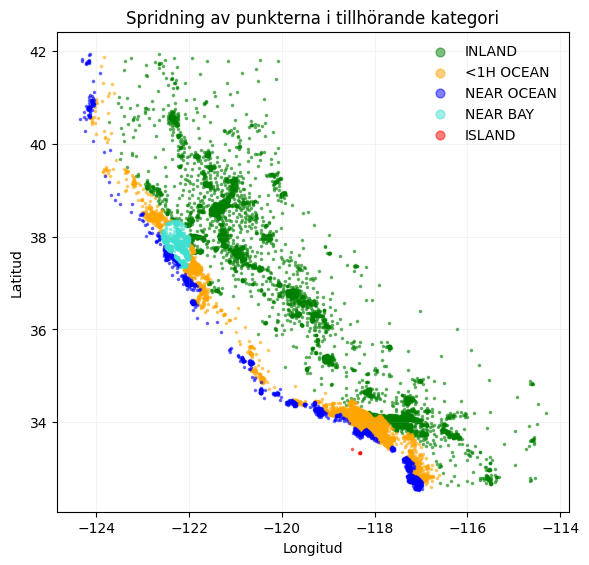

In [366]:
color_map = {
    'INLAND': 'green',
    '<1H OCEAN': 'orange',
    'NEAR OCEAN': 'blue',
    'NEAR BAY': 'turquoise',
    'ISLAND': 'red'
}

plt.figure(figsize=(6, 8))

for category, color in color_map.items():
    subset = aggregated[aggregated['ocean_proximity'] == category]
    plt.scatter(
        subset['longitude'],
        subset['latitude'],
        s=2.5,
        color=color,
        label=category,
        alpha=.5
    )

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(markerscale=4, frameon=False, loc='upper right')
plt.title('Spridning av punkterna i tillhörande kategori')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

Därefter one-hot-encodas dataframen med funktionen one_hot där första kategorin droppas, i detta fallet <1h from ocean som var den näst mest förekommande på drygt 1/3 av grupperna efter aggregeringen, vilket även är det mest rimliga valet då tre av de återstående fyra kategorierna omfattas av <1h from ocean även om de har mer specifika beskrivningar, dessa dummy-kolumner läggs till i feat_cols.

Jag väljer även att droppa all data där medelvärdet för husen inom områdena i fråga låg på $500001 då det var orimligt många på den nivån vilket tyder på att det fanns en cap på det beloppet och att medelvärdet för dessa husen egentligen kan ha varit långt över det beloppet och därmed hade påverkat träffsäkerheten av modellen på ett negativt sett.

In [367]:
def one_hot(df, cat_cols=None, drop_first=True):
    df_prepared = df.copy()

    if cat_cols is not None:
        df_prepared = pd.get_dummies(df_prepared, columns=cat_cols, drop_first=drop_first)
    
    return df_prepared

aggregated = one_hot(aggregated, cat_cols=['ocean_proximity'], drop_first=True)

dummy_cols = [col for col in aggregated.columns if col.startswith('ocean_proximity_')]

feat_cols = feat_cols + dummy_cols

aggregated = aggregated[aggregated['median_house_value'] < 500001]

Bygger X- och Y-matriser för regression och lägger till intercept $\beta_0$ med funktionen build_X_Y från linreg.py. Därefter definierar jag antalet observationer $n$ och antalet variabler $d$ där jag subtraherar 1 från den sistnämnda för att den nyligen tillagda intercepten inte ska påverka senare uträkningar.

In [368]:
X, Y = build_X_Y(aggregated, feat_cols, target_col='median_house_value')
n = X.shape[0]
d = X.shape[1] - 1

Kallar funktioner i min LinearRegression-klass och printar resultatet för den mer grundläggande statistiken utifrån min aggregerade dataframe med uträkningar enligt följande formler

$\hat{\beta} = (X^TX)^{-1}X^TY \Rightarrow$ modellens beta-värden  
$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 + \hat{\beta}_3X_3 ... + \hat{\beta}_dX_d \Rightarrow$  modellens prediktioner  
$\hat{e}_i = Y_i - \hat{Y}_i \Rightarrow$ modellens residualer  
$SSE = \sum_{i=1}^{n} e_i^2 \Rightarrow$ modellens SSE  
$\hat{\sigma}^2 = \frac{SSE}{n-d-1} \Rightarrow$ modellens varians  
$\hat{\sigma} = \sqrt{\hat{\sigma}^2} \Rightarrow$ modellens STD  
$RMSE = \sqrt{\frac{SSE}{n}} \Rightarrow$ modellens RMSE

STD och RMSE är väldigt nära varandra p.g.a. väldigt högt n-tal gentemot d-tal även om formlerna är annorlunda eftersom $\sqrt{\frac{SSE}{12065-11-1}} \approx \sqrt{\frac{SSE}{12065}}$. Hade detta varit linjär regression för ML så hade man använt $\hat{\sigma}^2 = \frac{SSE}{n}$ för variansen vilket hade inneburit att STD = RMSE men då denna uppgiften är en rent statistisk analys använder vi $\hat{\sigma}^2 = \frac{SSE}{n-d-1}$ som är den opartiska uträkningen även om resultaten i detta fallet är väldigt nära varandra.

In [369]:
model = LinearRegression(X, Y)
print(f'modellens beta-värden: {model.b_est}')
print(f'modellens prediktioner: {model.Y_est}')
print(f'modellens residualer: {model.residuals}')
print(f'modellens SSE: {model.SSE}')
print(f'modellens varians: {model.variance}')
print(f'modellens STD: {model.STD}')
print(f'modellens RMSE: {model.RMSE}')

modellens beta-värden: [ 5.01160896e+04 -5.28416860e+03  7.87256971e+02  3.97323158e+04
 -1.61482655e+00  2.32222942e+01 -1.98464814e+01  4.76181392e+01
 -6.12237917e+04  1.95891175e+05 -4.37375768e+02  2.00749142e+04]
modellens prediktioner: [196982.23616074 129684.93594905 169254.66134766 ...  47929.58434363
  78969.94694176  53352.36286545]
modellens residualer: [-102382.23616074  -43884.93594905  -65654.66134766 ...   39570.41565637
    1130.05305824   13547.63713455]
modellens SSE: 39103824940485.15
modellens varians: 3244322985.189177
modellens STD: 56958.958779011904
modellens RMSE: 56930.62568551


Går vidare med lite mer avancerad statistik.

$C = \hat{\sigma}^2(X^TX)^{-1} \Rightarrow$ modellens varians-kovariansmatris  
$t_i = \frac{\hat{\beta}_i}{\hat{\sigma}\sqrt{c_{ii}}} \Rightarrow$ modellens t-statistik  
$p_i = 2(1-F_{t_{n-d-1}}(|t_i|)) \Rightarrow$ modellens p-värden

In [370]:
print(f'modellens varians-kovariansmatris: {model.C}')
print(f'modellens t-statistik: {model.t_stats}')
print(f'modellens p-värden: {model.p_values}')

modellens varians-kovariansmatris: [[ 1.01984297e+07 -8.58385287e+05 -8.99936021e+04 -9.17077101e+05
   2.94676863e+02 -1.44409101e+03 -4.00655039e+02  4.35624839e+02
  -2.44762821e+06 -1.11899626e+06  1.65236509e+05 -7.56197000e+05]
 [-8.58385287e+05  2.46531056e+05  2.32411138e+03  2.38819790e+04
  -1.85779864e+01 -4.89677951e+01  2.90545573e+01  8.36018805e+01
   4.77337516e+04 -3.94183983e+03 -1.29567245e+05 -1.18522764e+05]
 [-8.99936021e+04  2.32411138e+03  2.43630756e+03  3.96800025e+03
   2.98126305e+00  1.41629909e+01  6.69478040e-01 -2.90702094e+01
   1.20365977e+04 -3.39018969e+04 -1.70384298e+04 -1.19767063e+03]
 [-9.17077101e+05  2.38819790e+04  3.96800025e+03  1.75570126e+05
  -1.04144153e+02  3.76561313e+02  3.83548225e+01  1.15735687e+00
   2.31949832e+05  1.78385592e+05 -1.64371479e+04  6.19159685e+04]
 [ 2.94676863e+02 -1.85779864e+01  2.98126305e+00 -1.04144153e+02
   2.49932392e-01 -6.20584141e-01 -4.82974287e-02 -3.34901493e-01
  -1.29246070e+02 -8.98521941e+01 -5.

| Index | Variabel | p‑värde | % |  
|:-----:|----------|---------|----:|  
| 0 | intercept | 5.89e-055 | $\lt$ 0,01% |  
| 1 | distance_to_centroid | 2.48e-026 | $\lt$ 0,01% |  
| 2 | housing_median_age | 1.09e-056 | $\lt$ 0,01% |  
| 3 | median_income | 0.00e+00 | $\ll$ 0,01% |  
| 4 | total_rooms | 1.24e-03 | $\approx$ 0,12% |  
| 5 | total_bedrooms | 3.80e-09 | $\lt$ 0,01% |  
| 6 | population | 1.85e-181 | $\lt$ 0,01% |  
| 7 | households | 6.58e-25 | $\lt$ 0,01% |  
| 8 | INLAND | 0.00e+00 | $\ll$ 0,01% |  
| 9 | ISLAND | 1.75e-14 | $\lt$ 0,01% |  
| 10 | NEAR_BAY | 8.34e-01 | $\approx$ 83,4% |  
| 11 | NEAR_OCEAN | 2.06e-29 | $\lt$ 0,01% |

Regressionsresultaten visar att majoriteten av variablerna uppvisar mycket stark statistisk signifikans för att förklara variationen i median_house_value, detta är dock att förväntas med ett såpass stort stickprov.

Variabeln total_rooms är en utstickare bland de signifikanta variablerna då den är tydligt signifikant på $\approx$ 0,12%, men är fortfarande marginellt svagare än de andra starkt signifikanta variablerna.

NEAR_BAY är däremot tydligt statistiskt insignifikant med ett p-värde på $\approx$ 83,4%, vilket indikerar att dess effekt inte kan särskiljas från noll givet de övriga variablerna i modellen. Detta tyder på att variationen som annars kunde kopplas till denna kategori i stället fångas upp av andra geografiska och strukturella variabler i regressionen.

Efter att ha undersökt korrelationen mellan de numeriska variablerna med hjälp av Pearsonr slås total_rooms och households ihop till en ny variabel rooms_per_household samt population och households till people_per_household. Variabeln total_bedrooms tas bort då dess effekt i princip redan fångas upp av de nya sammanslagna variablerna. Detta görs för att förbättra modellens tolkbarhet och minska påverkan av outliers då de enda NaN som fanns med var i just total_bedrooms.

In [ ]:
aggregated['rooms_per_household'] = aggregated['total_rooms'] / aggregated['households']
aggregated['people_per_household'] = aggregated['population'] / aggregated['households']

cat_cols = [col for col in aggregated.columns if col.startswith('ocean_proximity_')]

aggregated = aggregated.drop(columns=[
    'longitude', 'latitude',
    'total_rooms', 'households',
    'total_bedrooms', 'population'
])

ordered_cols = [
    'distance_to_centroid',
    'housing_median_age',
    'median_income',
    'rooms_per_household',
    'people_per_household'
] + cat_cols

aggregated = aggregated[ordered_cols + ['median_house_value']]

X_2, Y_2 = build_X_Y(aggregated, feat_cols=ordered_cols, target_col='median_house_value')
n = X.shape[0]
d = X.shape[1] - 1

model_2 = LinearRegression(X_2, Y_2)

Kontrollerar sedan Pearsonr igen för att stämma av att inga variabler återstår med stark kolinearitet (bortsett från median_income och median_house_value) varken bland de numeriska

In [ ]:
num_cols = [
    'distance_to_centroid',
    'housing_median_age',
    'median_income',
    'rooms_per_household',
    'people_per_household',
    'median_house_value'
]

idx_to_name = dict(enumerate(num_cols))

X_full = aggregated[num_cols].to_numpy(dtype=float)

raw_corr = model.pearson_numeric(X_full)

corr_df = pd.DataFrame(
    raw_corr,
    columns=['idx1', 'idx2', 'Pearsonr']
)

corr_df['Var1'] = corr_df['idx1'].map(idx_to_name)
corr_df['Var2'] = corr_df['idx2'].map(idx_to_name)

target_corr = corr_df[corr_df['Var2'] == 'households']

corr_df.sort_values(by='Pearsonr', key=abs, ascending=False)

,idx1,idx2,Pearsonr,Var1,Var2
0,0,0,1.000000,distance_to_centroid,distance_to_centroid
9,3,3,1.000000,median_house_value,median_house_value
7,2,2,1.000000,median_income,median_income
4,1,1,1.000000,housing_median_age,housing_median_age
8,2,3,0.709767,median_income,median_house_value
5,1,2,-0.190827,housing_median_age,median_income
1,0,1,-0.055216,distance_to_centroid,housing_median_age
6,1,3,0.045631,housing_median_age,median_house_value
3,0,3,-0.041414,distance_to_centroid,median_house_value
2,0,2,-0.037439,distance_to_centroid,median_income


eller de kategoriska

In [373]:
aggregated_2 = aggregate(housing)

aggregated_2 = aggregated_2[aggregated_2['median_house_value'] < 500001]
aggregated_2['rooms_per_household'] = aggregated_2['total_rooms'] / aggregated_2['households']
aggregated_2['people_per_household'] = aggregated_2['population'] / aggregated_2['households']

aggregated_2 = aggregated_2.drop(columns=[
    'longitude', 'latitude',
    'total_rooms', 'households',
    'total_bedrooms', 'population'
])

df_cat = one_hot(
    aggregated_2,
    cat_cols=['ocean_proximity'],
    drop_first=False
)

cat_dummy_cols = [c for c in cat_cols if c.startswith('ocean_proximity_')]

X_cat = df_cat[cat_dummy_cols].to_numpy()
X_num = df_cat[num_cols].to_numpy()

raw_cat_corr = model_2.pearson_categorical_numeric(X_cat, X_num)

corr_cat_df = pd.DataFrame(
    raw_cat_corr,
    columns=['cat_idx', 'num_idx', 'Pearsonr']
)

cat_idx_to_name = dict(enumerate(cat_dummy_cols))
num_idx_to_name = dict(enumerate(num_cols))

corr_cat_df['Category'] = corr_cat_df['cat_idx'].map(cat_idx_to_name)
corr_cat_df['Variable'] = corr_cat_df['num_idx'].map(num_idx_to_name)

corr_cat_df.sort_values(by=['Pearsonr'], key=abs, ascending=[False])

,cat_idx,num_idx,Pearsonr,Category,Variable
3,0,3,-0.558968,ocean_proximity_INLAND,median_house_value
2,0,2,-0.320960,ocean_proximity_INLAND,median_income
1,0,1,-0.192861,ocean_proximity_INLAND,housing_median_age
9,2,1,0.188639,ocean_proximity_NEAR BAY,housing_median_age
15,3,3,0.185459,ocean_proximity_NEAR OCEAN,median_house_value
11,2,3,0.173715,ocean_proximity_NEAR BAY,median_house_value
12,3,0,0.147965,ocean_proximity_NEAR OCEAN,distance_to_centroid
8,2,0,0.107394,ocean_proximity_NEAR BAY,distance_to_centroid
10,2,2,0.102157,ocean_proximity_NEAR BAY,median_income
0,0,0,-0.071811,ocean_proximity_INLAND,distance_to_centroid


Med ovan nämnda förbättring går jag vidare med den avancerade statistiken.

$S_{yy} = \sum(Y_i - \bar{Y})^2 = \sum{Y_{i}}^2 - \frac{(\sum{Y_i})^2}{n} \Rightarrow$ Modellens $S_{yy}$  
$SSR = S_{yy} - SSE \Rightarrow$ modellens SSR

In [374]:
print(f'medelvärdet av huspriserna: {model_2.Y_mean:.3f}')
print(f'modellens Syy: {model_2.Syy:.3f}')
print(f'modellens SSR: {model_2.SSR:.3f}')

medelvärdet av huspriserna: 188085.240
modellens Syy: 121106082841917.656
modellens SSR: 77776035751834.188


$F = \frac{SSR/d}{\hat{\sigma}^2} \Rightarrow$ modellens F-statistik  
$p$-value $= P(F_{d,n-d-1} \gt F_{obs}) \Rightarrow$ modellens p-värde  
$R^2 = \frac{SSR}{S_{yy}} \Rightarrow$ modellens $R^2$

In [375]:
print(f'modellens F-statistik: {model_2.F_stat:.3f}')
print(f'modellens p_värde: {model_2.F_p_value:.3f}')
print(f'modellens R2: {model_2.R2:.3f}')

modellens F-statistik: 3091.704
modellens p_värde: 0.000
modellens R2: 0.642


$CI_i = \hat{\beta}_i \pm t_{1-\alpha/2,n-d-1} \cdot \sqrt{\hat{\sigma}^2c_{ii}} \Rightarrow$ Räknar ut konfidensintervall för varje variabel som jag sätter till 60% baserat på förklaringsgraden $R^2$ för min modell som ligger på ungefär 64% varpå jag avrundat ner.

In [376]:
intervals = model_2.confidence_intervals(alpha=0.4)

for i, (low, high) in enumerate(intervals):
    print(f'Konfidensintervall för {ordered_cols[i-1] if i>0 else 'intercept'}: {low:.3f} — {high:.3f}')

Konfidensintervall för intercept: 54649.237 — 59781.772
Konfidensintervall för distance_to_centroid: -5022.865 — -4151.745
Konfidensintervall för housing_median_age: 747.898 — 834.043
Konfidensintervall för median_income: 38507.181 — 39142.516
Konfidensintervall för ocean_proximity_INLAND: -64720.539 — -62495.742
Konfidensintervall för ocean_proximity_ISLAND: 173674.748 — 218853.415
Konfidensintervall för ocean_proximity_NEAR BAY: 7444.934 — 11099.573
Konfidensintervall för ocean_proximity_NEAR OCEAN: 21765.545 — 24894.807


Med detta har jag då nått vad jag tycker är en rimlig och enkelt tolkad regressionsanalys av det givna datasetet.